### Importing 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar as cal
import plotly.express as px
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')
datasetT3 = pd.read_excel("T-measures.xlsx")
datasetIncidentOverviews = pd.read_excel("Incident Overviews.xls")
datasetOverviewsDelays = pd.read_excel("Overviews Delays.xlsx")

# Basic checks

In [ ]:
datasetT3.shape

(22441, 9)

In [ ]:
datasetIncidentOverviews.shape

(557, 35)

In [ ]:
datasetOverviewsDelays.shape

(2653, 28)

In [197]:
datasetIncidentOverviews.isna().sum()
#datasetIncidentOverviews.describe()

Inc Value                        0
Inc Date                         0
Dispute Status                   0
Bugle Mgr                        0
Trust Mgr                        0
Nr Mgr                           0
Inc Cause                        0
Root Cause                     507
Root Cause Desc                  0
Inc Location                    10
Memo                             0
Equip                            0
Sum Total Inc Mins               0
Sum Primary Delay Mins           0
Sum Reactnry Delay Mins          0
Count Cape                       0
Count Pine                       0
Count Calv                       0
Count Fts                        0
Count Journeys Affected          0
Sum Delay Mins                   0
Notes                            0
Kpi Code                         0
Bugle Status                     0
Rsp Period                       0
Count Dft Full Cancs             0
Count Dft Part & Unkn Cancs      0
Turn                           547
Paynum              

# Preprocessing

## Removing columns with NULL Values

Remove columns with high( >90%)  NULL values

### datasetIncidentOverviews table (April 2020 to 5 November 2021)

In [ ]:
#@title
print(datasetIncidentOverviews.shape)
datasetIncidentOverviews = datasetIncidentOverviews.drop(["Root Cause","Turn", "Paynum", "Fault System"], axis = 1)
print(datasetIncidentOverviews.shape)

(557, 35)
(557, 31)


In [ ]:
#datasetIncidentOverviews.head()

In [ ]:
print(datasetIncidentOverviews["Inc Date"].min(), datasetIncidentOverviews["Inc Date"].max())

2020-04-12 00:00:00 2021-11-05 00:00:00


This dataset contains data from April 2020

## Feature selection and Feature Engineering

In [ ]:
datasetIncidentOverviews_modified =  datasetIncidentOverviews.copy()

In [ ]:
datasetIncidentOverviews_modified = datasetIncidentOverviews_modified[["Inc Date", "Inc Cause", "Inc Location","Memo","Sum Total Inc Mins", "Sum Primary Delay Mins","Sum Reactnry Delay Mins", "Count Journeys Affected",
                                                                       "Sum Delay Mins", "Rsp Period", "Count Dft Full Cancs", "Count Dft Part & Unkn Cancs", "Inc Cause Short Desc", "Ppm Failure Count D", "Casl Failure Count D", "Weather Code"]]

In [ ]:
datasetIncidentOverviews_modified["Date"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).day
datasetIncidentOverviews_modified["Month"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).month
datasetIncidentOverviews_modified["Year"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).year
datasetIncidentOverviews_modified["Week"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).week

In [ ]:
#datasetIncidentOverviews_modified[datasetIncidentOverviews_modified["Year"] == 2020][datasetIncidentOverviews_modified["Month"] == 6 ]

### datasetOverviewsDelays ( April 2021 to Oct 2021)

In [ ]:
datasetOverviewsDelays.isnull().sum()
print(datasetOverviewsDelays.shape)
datasetOverviewsDelays = datasetOverviewsDelays.drop(["Root Cse","Turn", "Pno"], axis = 1)

(2653, 28)


In [ ]:
print(datasetOverviewsDelays["Jny Dt Rw"].min(), datasetOverviewsDelays["Jny Dt Rw"].max())

2021-04-06 00:00:00 2021-11-12 00:00:00


This contains only data from April 2021 to Oct 2021

In [ ]:
print(datasetOverviewsDelays)
#datasetOverviewsDelays = datasetOverviewsDelays.drop(["Root Cse","Turn", "Pno"], axis = 1)

      Jny Dt Rw      Hcde Strt Time     Org  ... Act Time  Turn  Pno  Weather Code
0    2021-04-13  729G48M8     22:30  EUSTON  ...    23:33   NaN  NaN      NR Other
1    2021-04-13  729G48M8     22:30  EUSTON  ...    23:07   NaN  NaN      NR Other
2    2021-04-13  729G48M8     22:30  EUSTON  ...    22:43   NaN  NaN      NR Other
3    2021-04-13  729G48M8     22:30  EUSTON  ...    23:39   NaN  NaN      NR Other
4    2021-04-13  729G48M8     22:30  EUSTON  ...    23:17   NaN  NaN      NR Other
...         ...       ...       ...     ...  ...      ...   ...  ...           ...
2648 2021-11-06  721D91MU     17:10  EUSTON  ...    20:56   NaN  NaN     NR Severe
2649 2021-11-08  421D91MX     18:56   CREWE  ...    21:04   NaN  NaN     NR Severe
2650 2021-11-09  421D82MF     09:51   CREWE  ...    12:00   NaN  NaN     NR Severe
2651 2021-11-10  421D91MX     18:56   CREWE  ...    21:05   NaN  NaN     NR Severe
2652 2021-11-12  421D84MJ     11:48   CREWE  ...    13:51   NaN  NaN     NR Severe

[26

In [ ]:
#datasetOverviewsDelays.head()

In [ ]:
#gets unique incident codes
datasetOverviewsDelays["Inc Cse"].value_counts()

JH    1365
XW     417
X2     358
X4     300
JK     104
VW      97
X3       8
IW       4
Name: Inc Cse, dtype: int64

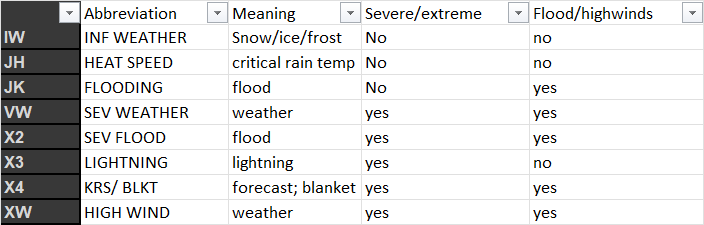

mapping of weather codes shows which codes need to be considered. 

'Inc Cse' has no empty values




In [ ]:
#gets unique delay codes
#datasetOverviewsDelays["Dly Cse"].value_counts()

In [ ]:
datasetOverviewsDelays_modified =  datasetOverviewsDelays.copy()

In [ ]:
datasetOverviewsDelays_modified["Date"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).day
datasetOverviewsDelays_modified["Month"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).month
datasetOverviewsDelays_modified["Year"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).year
datasetOverviewsDelays_modified["Week"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).week

In [ ]:
#datasetOverviewsDelays_modified.head()

### datasetT3

In [ ]:
datasetT3.isnull().sum()

Jny Dt Rw                0
Bgl Prft Cent            0
Bgl Prof                 0
Loc                      0
CP6: Within 3 mins       0
CP6: Within 15 mins      0
CP6: Count Trains Run    0
CP6: Within 3 mins %     0
CP6: Within 15 mins %    0
dtype: int64

In [ ]:
datasetT3_modified = datasetT3.copy()

In [ ]:
#Extracting day, month, year
datasetT3_modified["Date"] = pd.DatetimeIndex(datasetT3.iloc[:,0]).day
datasetT3_modified["Month"] = pd.DatetimeIndex(datasetT3.iloc[:,0]).month
datasetT3_modified["Year"] = pd.DatetimeIndex(datasetT3.iloc[:,0]).year
datasetT3_modified["Week"] = pd.DatetimeIndex(datasetT3.iloc[:,0]).week

In [ ]:
#datasetT3_modified["Month"] = datasetT3_modified["Month"].apply(lambda x: cal.month_abbr[x])

In [ ]:
datasetT3_modified.head()

,Jny Dt Rw,Bgl Prft Cent,Bgl Prof,Loc,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run,CP6: Within 3 mins %,CP6: Within 15 mins %,Date,Month,Year,Week
0,2021-11-13,21000000,EUS-W/MIDS,BHAM INTL,28,37,37,75.68,100.0,13,11,2021,45
1,2021-11-13,21000000,EUS-W/MIDS,BHAMNEWST,27,37,37,72.97,100.0,13,11,2021,45
2,2021-11-13,21000000,EUS-W/MIDS,COVENTRY,26,37,37,70.27,100.0,13,11,2021,45
3,2021-11-13,21000000,EUS-W/MIDS,EUSTON,32,37,37,86.49,100.0,13,11,2021,45
4,2021-11-13,21000000,EUS-W/MIDS,MILTON KC,4,7,7,57.14,100.0,13,11,2021,45


In [ ]:
datasetT3_modified.describe()
print(datasetT3_modified.shape)

(22441, 13)


# Info Dump

Preston	PRE
Kirkham & Wesham	KKM
Poulton-le-Fylde	PFY
Blackpool North	BPN
Lancaster	LAN
Oxenholme Lake District	OXN
Penrith	PNR
Carlisle	CAR
Lockerbie	LOC
Carstairs	CRS
Haymarket	HYM
Edinburgh	EDB
Motherwell	MTH
Glasgow	GLC

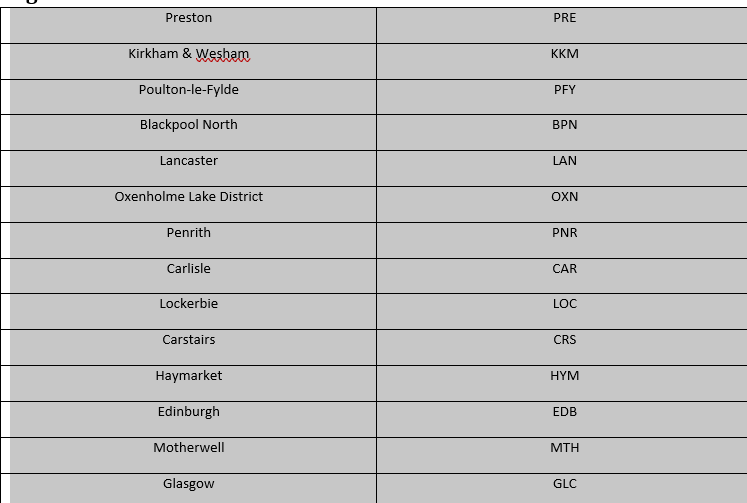

From Appendix 1 and 2 ->
North of preston Location codes

In [ ]:
locCodesNorth = ['PRE', 'KKM', 'PFY', 'BPN', 'LAN', 'OXN','PNR', 'CAR','LOC', 'CRS','HYM','EDB', 'MTH', 'GLC']
locNamesNorth = ['PRESTON', 'BPOOL NTH', 'LANCASTER', 'OXENHOLME', 'PENRITH', 'CARLISLE', 'LOCKERBIE', 'CARSTAIRS', 'HAYMARKET', 'EDINBURGH', 'MOTHERWELL', 'GLASGOW C']

# EDA on Incidents

## Incidents North of Preston

In [ ]:
dtIncidents = datasetIncidentOverviews_modified

In [ ]:
incidentsNorth = dtIncidents[dtIncidents["Inc Location"].isin(locCodesNorth)]
print(incidentsNorth.shape)

(30, 20)


In [190]:
dtIncidents = datasetIncidentOverviews_modified #datasetIncidentOverviews_modified

In [ ]:
print(dtIncidents.shape)

(30, 20)


## Group by year/ week/ month

In [ ]:
# dtIncidentsByYear = dtIncidents.groupby(["Year"])
# dtIncidentsByYear.sum().plot(kind='bar', figsize = (18,6), legend=True)
# #dtIncidentsByYear.sum().plot.bar()

In [ ]:
dtIncidentsByYear = dtIncidents.groupby(["Week","Year"])
# dtIncidentsByYear[].sum().plot(kind='bar', figsize = (18,6), legend=True)

In [ ]:
#dtIncidentsByYear.get_group((15,2020)).sort_values(by=["Week"])

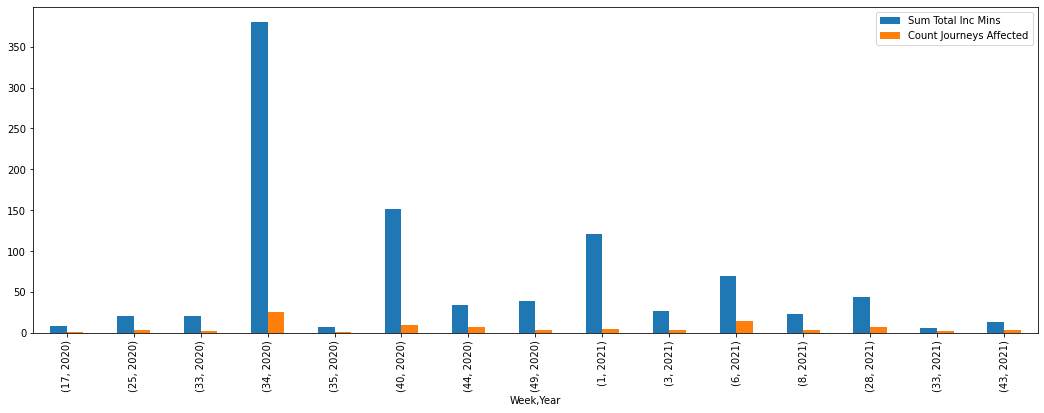

In [191]:
#dtIncidentsByYear = dtIncidents.groupby(["Year"])
dtIncidentsByYear["Sum Total Inc Mins", "Count Journeys Affected"].sum().sort_values(by=['Year','Week']).plot(kind='bar', figsize = (18,6), legend=True)
#dtIncidentsByYear.sum().plot.bar()

## Group by Incident Cause

In [195]:
selColsForIncidents = ["Sum Total Inc Mins", "Sum Primary Delay Mins","Sum Reactnry Delay Mins", "Count Journeys Affected"]

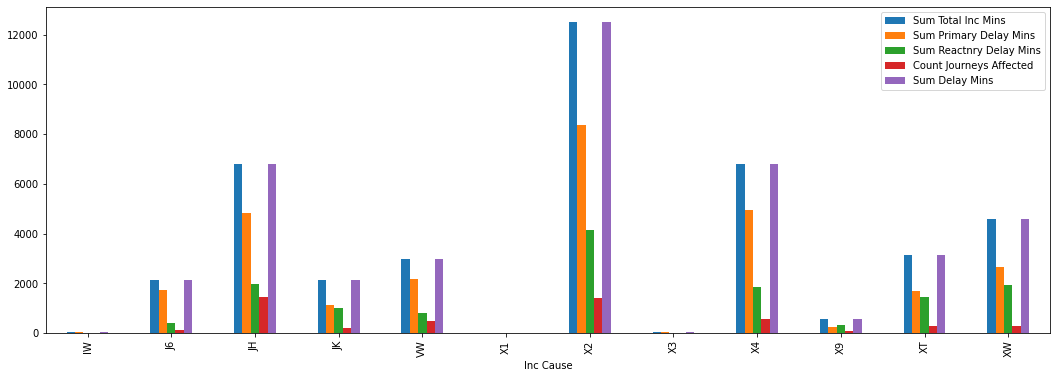

In [192]:
dtIncidentsByCause =  dtIncidents.groupby(["Inc Cause"])
dtIncidentsByCause[selColsForIncidents].sum().plot(kind='bar', figsize = (18,6), legend=True)

VW - severe weather

In [ ]:
dtIncidentsByCause.size()

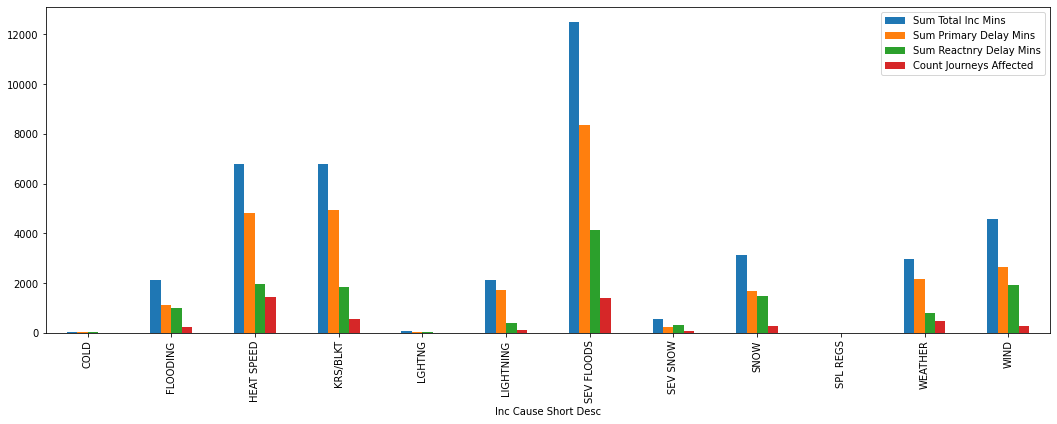

In [196]:
dtIncidentsByCause = dtIncidents.sort_values(by="Inc Cause").groupby(["Inc Cause Short Desc"])
dtIncidentsByCause[selColsForIncidents].sum().plot(kind='bar', figsize = (18,6), legend=True)

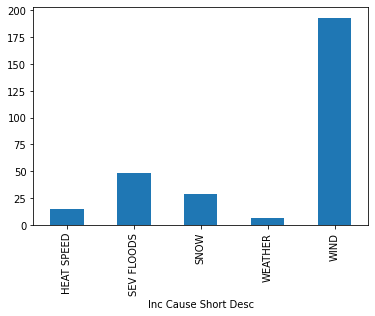

In [ ]:
(dtIncidentsByCause["Sum Delay Mins"].sum()/dtIncidentsByCause["Sum Delay Mins"].count()).plot(kind='bar')

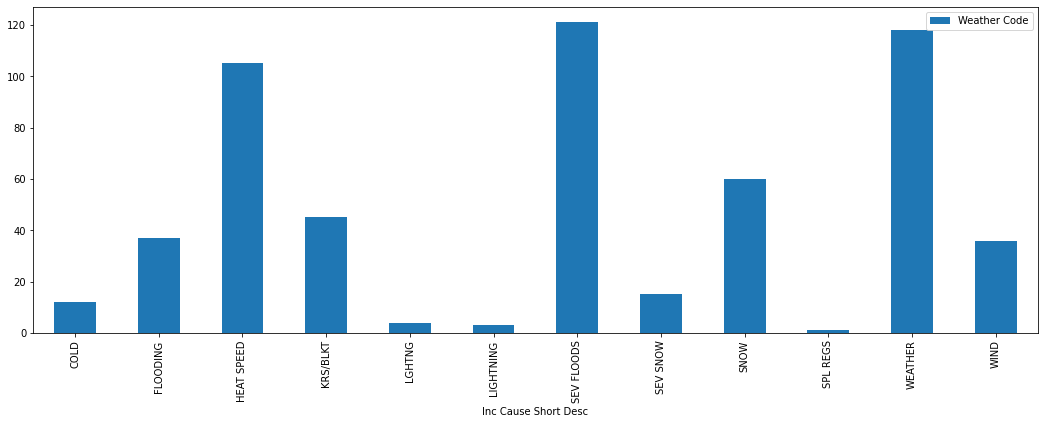

In [ ]:
dtIncidentsByCause["Weather Code"].count().plot(kind='bar', figsize = (18,6), legend=True)

### Month of October

In [ ]:
dtOctober = dtIncidents[(dtIncidents["Month"] == 10) &  (dtIncidents["Year"] == 2021)]

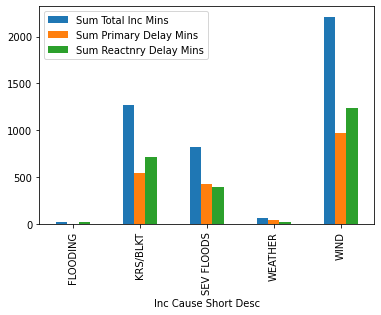

In [ ]:
dtOctober.groupby("Inc Cause Short Desc")["Sum Total Inc Mins", "Sum Primary Delay Mins", "Sum Reactnry Delay Mins"].sum().plot(kind = 'bar')

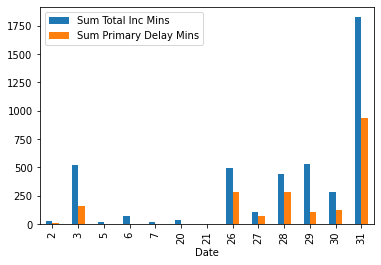

In [ ]:
dtOctober.groupby("Date")["Sum Total Inc Mins", "Sum Primary Delay Mins"].sum().plot(kind = 'bar')

# EDA on Delays

In [ ]:
dtDelays_groupedByIncCause = datasetOverviewsDelays.groupby("Inc Cse")

In [ ]:
datasetOverviewsDelays
selColsForDelays = ["Dly Mins"]

In [ ]:
dtDelays_groupedByIncCause.size()

Inc Cse
IW       4
JH    1365
JK     104
VW      97
X2     358
X3       8
X4     300
XW     417
dtype: int64

In [ ]:
#dtDelays_groupedByIncCause.sum()[selColsForDelays].plot(kind='bar', figsize = (18,6), legend=True)

## Delays in North

In [ ]:
dtDelays = datasetOverviewsDelays_modified

In [ ]:
delaysNorth = datasetOverviewsDelays_modified[datasetOverviewsDelays_modified["Dly Loc"].isin(locNamesNorth)]

In [ ]:
delaysNorth.shape

(276, 32)

In [ ]:
dtDelays = delaysNorth

## Group by year/ week/ month

In [ ]:
dtDelaysByYear = dtDelays.groupby(["Week","Year"])
# dtIncidentsByYear[].sum().plot(kind='bar', figsize = (18,6), legend=True)

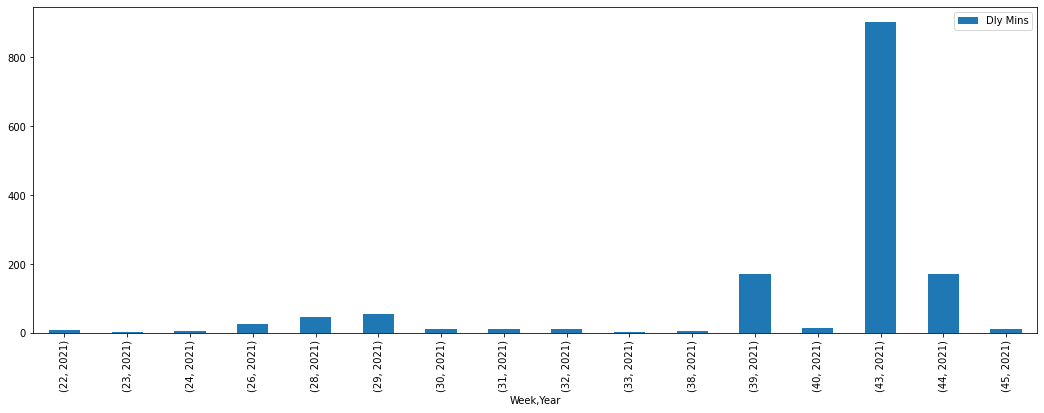

In [ ]:
#dtIncidentsByYear = dtIncidents.groupby(["Year"])
dtDelaysByYear[selColsForDelays].sum().plot(kind='bar', figsize = (18,6), legend=True)
#dtIncidentsByYear.sum().plot.bar()

# EDA on T-3 and T-15 data

In [ ]:
dtTrainsByDelayTimes = datasetT3_modified[["Year","Month","Date", "Loc", "CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"]]
dtTrainsByDelayTimes.head()

,Year,Month,Date,Loc,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run
0,2021,11,13,BHAM INTL,28,37,37
1,2021,11,13,BHAMNEWST,27,37,37
2,2021,11,13,COVENTRY,26,37,37
3,2021,11,13,EUSTON,32,37,37
4,2021,11,13,MILTON KC,4,7,7


If some of the trains were not within 15 mins, then we can get the number of trains delayed beyond 15 mins by subtracting number of trains run that day by number of trains that arrived with 15 mins.

In [ ]:
dtTrainsByDelayTimes["trainsNotIn15"] = dtTrainsByDelayTimes["CP6: Count Trains Run"] - dtTrainsByDelayTimes["CP6: Within 15 mins"]
dtTrainsByDelayTimes.head()

#Trains delayed by more than 15 mins
dtTrainsByDelayTimes = dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"] >0] #Remove zero

## Grouped by Month

In [ ]:
datasetT3_groupedByMonth = datasetT3_modified.groupby("Month")
#datasetT3_modified["CP6: Count Trains Run"].shape

### November

In [ ]:
datasetT3_Nov = datasetT3_modified[datasetT3_modified.Month == 11]
datasetT3_Nov.shape

(1342, 13)

In [ ]:
selectedCols = ["CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"]

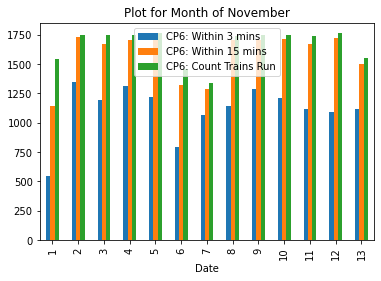

In [ ]:
datasetT3_Nov.groupby("Date")[selectedCols].sum().plot.bar(title ="Plot for Month of November")

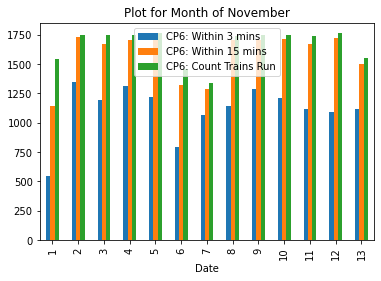

In [ ]:
datasetT3_Nov.groupby("Date")[selectedCols].sum().plot.bar(title ="Plot for Month of November")

In [ ]:
# dtTrainsByDelayTimes_groupedByMonth = dtTrainsByDelayTimes.groupby("Month")
# dtTrainsByDelayTimes_Nov = dtTrainsByDelayTimes[dtTrainsByDelayTimes.Month == 11]
# dtTrainsByDelayTimes_Nov.shape
# dtTrainsByDelayTimes_Nov.groupby("Date")["CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar(title ="Plot for Month of November")

### All Month-wise 

In [ ]:
dtTrainsByDelayTimesByMonth = dtTrainsByDelayTimes.groupby("Month")

In [ ]:
#sns.barplot(x="Date", y="trainsNotIn15", label="Month", data=dtTrainsByDelayTimes)
#dtTrainsByDelayTimes["Month"]<6

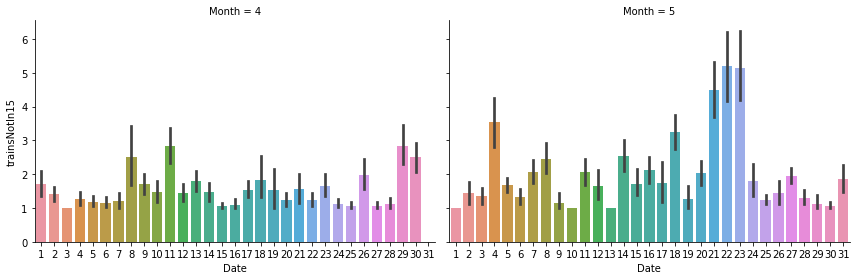

In [ ]:
g = sns.catplot(x="Date", y="trainsNotIn15",
                col="Month",
                data=dtTrainsByDelayTimes[dtTrainsByDelayTimes["Month"]<6], 
                kind="bar",
                height=4, aspect=1.5
                );

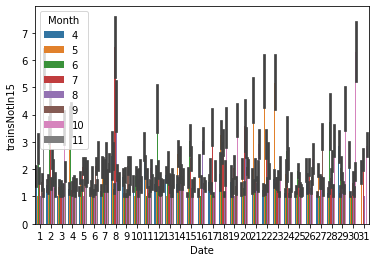

In [ ]:
sns.barplot(x="Date", y="trainsNotIn15", hue="Month", data=dtTrainsByDelayTimes)

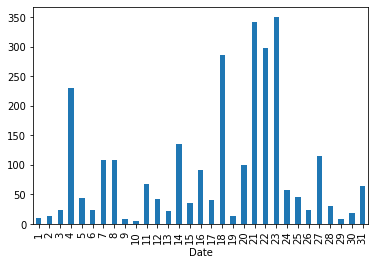

In [ ]:
dtTrainsByDelayTimes[dtTrainsByDelayTimes["Month"]==5].groupby(["Date"])["trainsNotIn15"].sum().plot.bar()

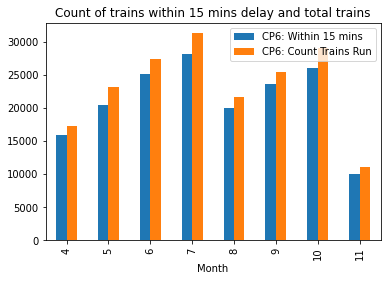

In [ ]:
dtTrainsByDelayTimesByMonth["CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar(title ="Count of trains within 15 mins delay and total trains")

In [ ]:
dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"] >0].count()
dtTrainsByDelayTimes.shape

(7834, 8)

In [ ]:
selectedCols.append( "trainsNotIn15")

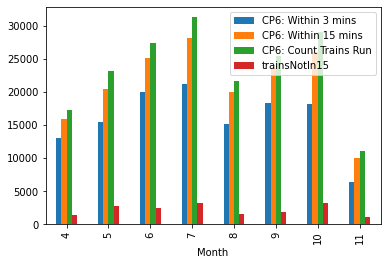

In [ ]:
dtTrainsByDelayTimesByMonth[selectedCols].sum().plot.bar()

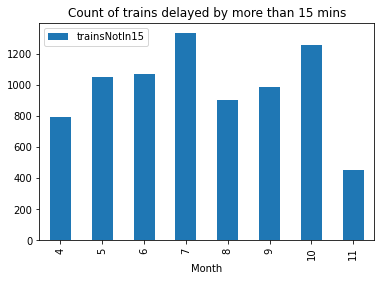

In [ ]:
dtTrainsByDelayTimesByMonth["trainsNotIn15"].count().plot.bar(legend=True, title="Count of trains delayed by more than 15 mins")

Highest delay seen in July > October

In [ ]:
#plt.bar(dtTrainsByDelayTimes["Month"], (dtTrainsByDelayTimes["trainsNotIn15"] >0))

In [ ]:
#dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"]>0][dtTrainsByDelayTimes["Month"]==11]

In [ ]:
#Incorrect graph - Nov has only 448 rows but this shows the row number equivalent value
# fig = px.bar(dtTrainsByDelayTimes, x='Month', y='trainsNotIn15')
# fig.show()

In [ ]:
#plt.bar(datasetT3_modified["Month"], datasetT3_modified["CP6: Within 3 mins"])

## Grouped by Location

In [188]:
dtTrainsByDelayTimes_groupedByLocation = dtTrainsByDelayTimes[dtTrainsByDelayTimes["Loc"].isin(locNamesNorth)].groupby("Loc")

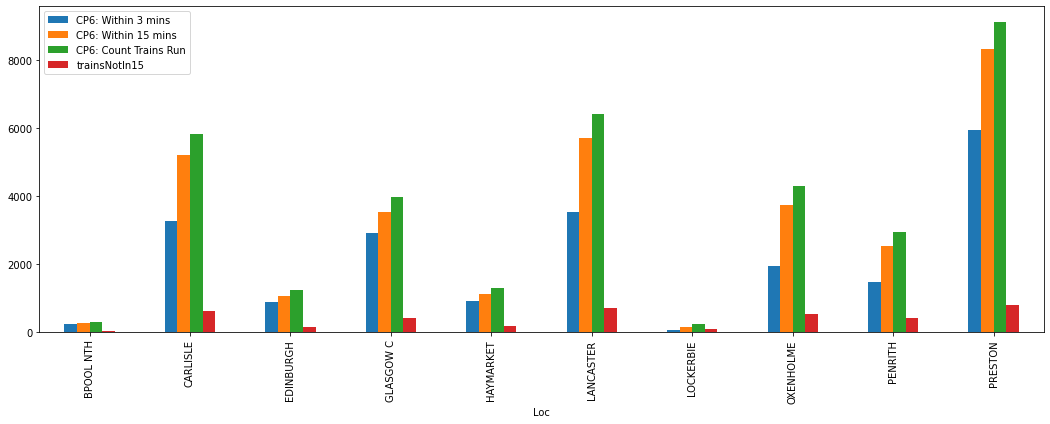

In [189]:
dtTrainsByDelayTimes_groupedByLocation.sum()[selectedCols].plot(kind='bar', figsize = (18,6), legend=True)

In [ ]:
dtTrainsByDelayTimes_groupedByLocation.count()

,Year,Month,Date,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run,trainsNotIn15
Loc,,,,,,,
BANGOR,48,48,48,48,48,48,48
BHAM INTL,260,260,260,260,260,260,260
BHAMNEWST,268,268,268,268,268,268,268
BLETCHLEY,1,1,1,1,1,1,1
BPOOL NTH,29,29,29,29,29,29,29
CARLISLE,269,269,269,269,269,269,269
CHESTER,50,50,50,50,50,50,50
COLWYNBAY,32,32,32,32,32,32,32
COVENTRY,250,250,250,250,250,250,250


In [ ]:
#@title
#dtTrainsByDelayTimes_groupedByLocation.plot.bar()

# PCA